In [5]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [2]:
import numpy as np

In [6]:
# Read the data from the CSV file with read from Numpy
data = np.genfromtxt("Salary_dataset.csv", delimiter=",", skip_header=1)

print(data)

[[0.00000e+00 1.20000e+00 3.93440e+04]
 [1.00000e+00 1.40000e+00 4.62060e+04]
 [2.00000e+00 1.60000e+00 3.77320e+04]
 [3.00000e+00 2.10000e+00 4.35260e+04]
 [4.00000e+00 2.30000e+00 3.98920e+04]
 [5.00000e+00 3.00000e+00 5.66430e+04]
 [6.00000e+00 3.10000e+00 6.01510e+04]
 [7.00000e+00 3.30000e+00 5.44460e+04]
 [8.00000e+00 3.30000e+00 6.44460e+04]
 [9.00000e+00 3.80000e+00 5.71900e+04]
 [1.00000e+01 4.00000e+00 6.32190e+04]
 [1.10000e+01 4.10000e+00 5.57950e+04]
 [1.20000e+01 4.10000e+00 5.69580e+04]
 [1.30000e+01 4.20000e+00 5.70820e+04]
 [1.40000e+01 4.60000e+00 6.11120e+04]
 [1.50000e+01 5.00000e+00 6.79390e+04]
 [1.60000e+01 5.20000e+00 6.60300e+04]
 [1.70000e+01 5.40000e+00 8.30890e+04]
 [1.80000e+01 6.00000e+00 8.13640e+04]
 [1.90000e+01 6.10000e+00 9.39410e+04]
 [2.00000e+01 6.90000e+00 9.17390e+04]
 [2.10000e+01 7.20000e+00 9.82740e+04]
 [2.20000e+01 8.00000e+00 1.01303e+05]
 [2.30000e+01 8.30000e+00 1.13813e+05]
 [2.40000e+01 8.80000e+00 1.09432e+05]
 [2.50000e+01 9.10000e+00

In [7]:
# Separate the features (YearsExperience) from the target variable (Salary)
X = data[:, 1]
y = data[:, 2]

# X = X.reshape(-1, 1)
print(X, y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6] [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


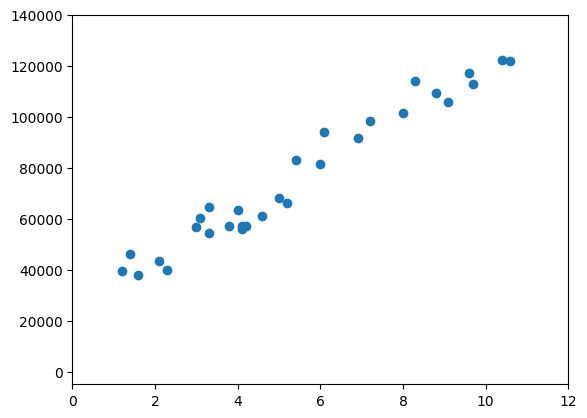

In [8]:
#This time seaborn is forbidden, you have to find a library that works with numpy
import matplotlib.pyplot as plt

plt.scatter(X, y);
plt.ylim(-5000, 140000)
plt.xlim(0, 12);

In [9]:
# Let's create a function that displays the point line with the bar.
def visualize(theta, X, y):
    plt.scatter(X, y)

    plt.ylim(-5000, 140000)
    plt.xlim(0, 12)
    x_line = np.linspace(0, 12, 100)
    y_line = theta[0] + theta[1] * x_line
    plt.plot(x_line, y_line)
    plt.show()

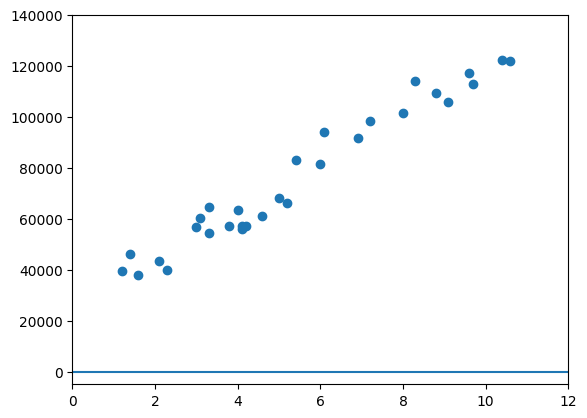

In [10]:
# Ok, let's test our function now, you should get a result comparable to this one

theta = np.zeros(2)
visualize(theta, X, y)

In [11]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

def predict(X, theta):
    return [X * theta[1] + theta[0]]

In [12]:
def fit(X, y, theta, alpha, num_iters):
    # Initialize some useful variables
    m = X.shape[0]

    # Loop over the number of iterations
    for _ in range(num_iters):
        predictions = predict(X, theta)
        error = predictions - y
        theta[0] -= alpha * (1/m) * np.sum(error)
        theta[1] -= alpha * (1/m) * np.sum(X * error)
        # Perform one iteration of gradient descent (i.e., update theta once)
    return theta

In [23]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000

theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1000)
print(f"[{finetuned_theta[0]:.12f}, {finetuned_theta[1]:.12f}]")

#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]

[21912.589184223289, 9880.814004608217]


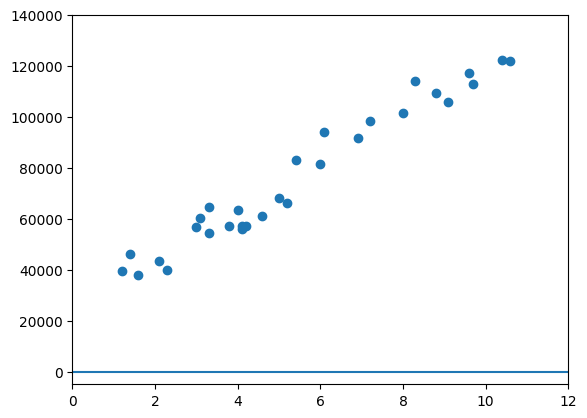

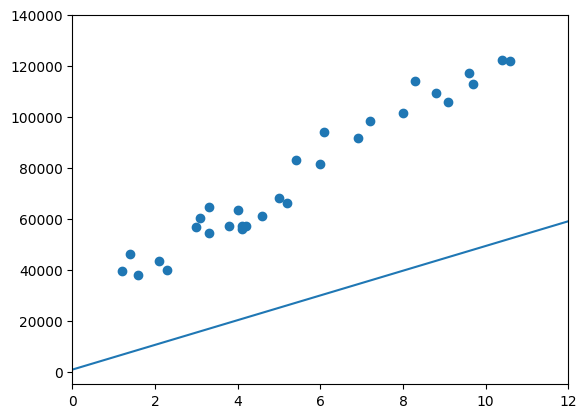

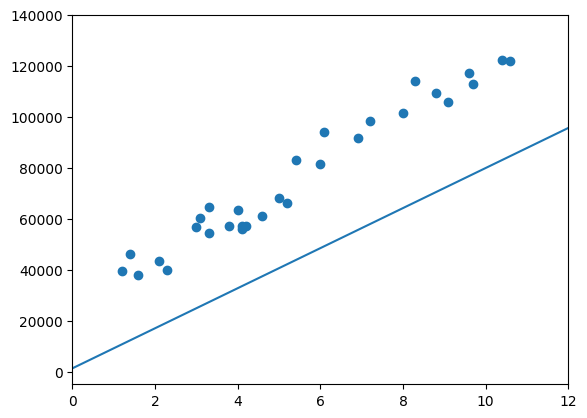

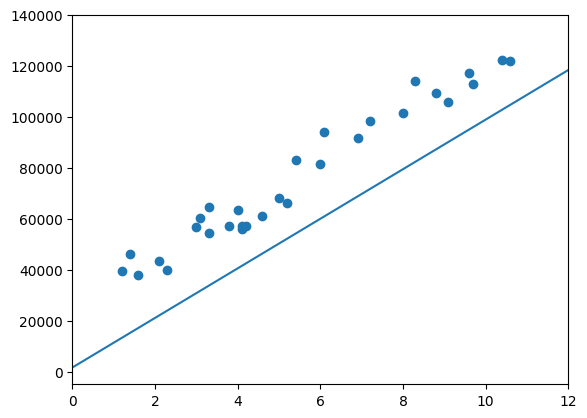

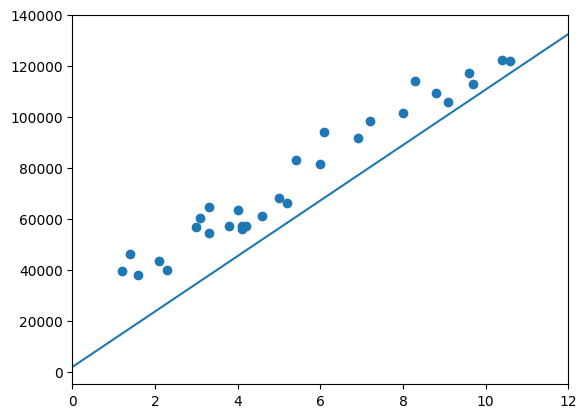

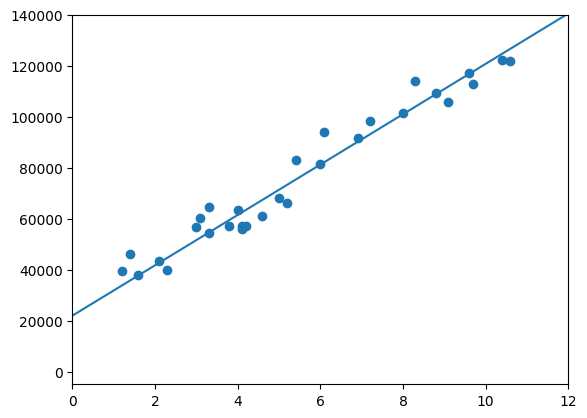

In [14]:
# Ok, let's test our function now, you should get a result comparable to this one

theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 0), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 1), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 2), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 3), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 4), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 1000), X, y)

In [15]:
def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    predictions = predict(X, theta)
    error = y - predictions

    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    cost = np.sum(error ** 2) * (1 / (2 * error.shape[1]))

    # Return the computed cost as a measure of model fit
    return cost


In [16]:
# Test it with theta = [0,0]. You should get approximately 3251553638.

cost_for_theta_zero = cost(X, y, [0, 0])
print(cost_for_theta_zero)

3251553638.866667


In [17]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store cost values at each iteration

    # Loop over the specified number of iterations
    for itr in range(num_iters):
        # Calculate the loss (difference between predictions and actual values)
        predictions = predict(X, theta)
        error = y - predictions

        # Update the temporary values of theta for both coefficients using the gradient descent formula

        # Update the theta values

        # Calculate and append the cost for the current theta values to the history list
        cost = np.sum(error ** 2) * (1 / (2 * error.shape[1]))
        J_history.append(cost)

        # Perform one iteration of gradient descent (update theta values)
        theta[0] += alpha * (1/m) * np.sum(error)
        theta[1] += alpha * (1/m) * np.sum(X * error)

    # Return the final theta values and the list of cost values over iterations
    return (theta, J_history)

In [18]:
# First, we initialize theta to zero
theta = np.zeros(2)

# Start the training using your new function
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

print(theta, J_history)

[ 2309.28858258 12482.56250236] [3251553638.866667, 3015112434.5917063, 2796244809.6039634, 2593644476.8563786, 2406102248.8579545, 2232498820.0229063, 2071798085.5257049, 1923040956.7821906, 1785339636.641324, 1657872320.116127, 1539878289.0224383, 1430653371.2453454, 1329545737.5295925, 1235952010.7049966, 1149313664.1227748, 1069113687.8050501, 994873502.4077171, 926150102.5761132, 862533412.6421436, 803643838.8790003, 749130003.702858, 698666648.2969786, 651952691.1389683, 608709430.8425195, 568678882.5863823, 531622238.20069975, 497318440.7189428, 465562864.8869374, 436166095.7529269, 408952798.04806566, 383760669.6086659, 360439472.59316254, 338850136.7111264, 318863929.11148745, 300361685.9750264, 283233101.2245028, 267376068.10672152, 252696069.71644065, 239105614.82414535, 226523715.64014605, 214875404.39776465, 204091285.8700916, 194107123.14928317, 184863454.2159108, 176305237.00966078, 168381520.88281125, 161045142.4753846, 154252444.19665658, 147963013.63263145, 142139442.

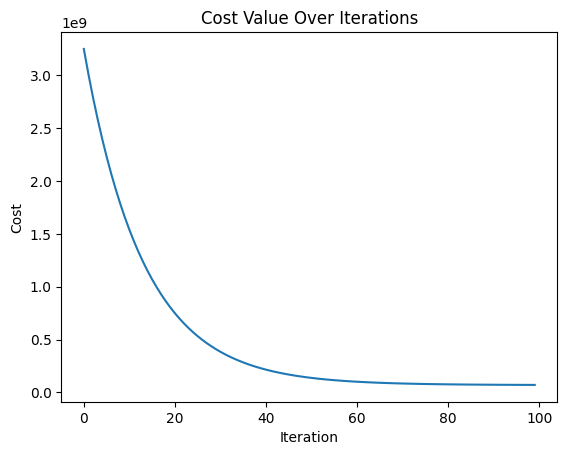

In [19]:
#You have to reproduce this graph
plt.plot(J_history)
plt.title("Cost Value Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [20]:
# Years of experience of the person you want to predict the salary for
years_experience = 10

# Predict the salary
predicted_salary = predict(years_experience, theta)[0]

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))

Predicted salary for 10 years of experience 127134.91360616997
